In [1]:
from pathlib import Path
from src.core_eda import TextEDA, TextPLOT
import duckdb

In [2]:
path = Path.home() / 'Downloads/Data/cx_product_review'

In [3]:
def load_data(file: Path, sample: int = None):
    query = f"""
    select distinct * exclude(comment_star)
    , cast(unnest(comment_star, recursive := true)::json as STRUCT(comment_id bigint, comment VARCHAR, rating_star int)) comment_star
    from read_parquet('{str(file)}')
    """
    df = (
        duckdb.sql(query).pl()
        .unnest('comment_star')
    )
    if sample:
        df = df.sample(sample)

    print(
        f'Data Shape: {df.shape} \n'
        f'Items: {df['item_id'].n_unique():,.0f} \n'
        f'Comments: {df['comment_id'].n_unique():,.0f}'
    )
    return df

In [4]:
file = path / 'raw_choice.parquet'

# load data
df = (
    load_data(file, sample=30_000)
    .pipe(TextEDA.clean_text, col='comment')
    .pipe(TextEDA.len_text, col='comment_clean')
    .pipe(TextEDA.detect_phone, col='comment_clean')
    .pipe(TextEDA.detect_url, col='comment_clean')
    .pipe(TextEDA.detect_words, col='comment_clean', patterns=['xu'])
)

print(df['phone_detect'].value_counts())
print(df['url_detect'].value_counts())
df.head()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Data Shape: (30000, 8) 
Items: 3,589 
Comments: 29,816


[TextEDA] Clean Text: 100%|██████████| 30000/30000 [00:01<00:00, 18237.64it/s]


shape: (2, 2)
┌──────────────┬───────┐
│ phone_detect ┆ count │
│ ---          ┆ ---   │
│ bool         ┆ u32   │
╞══════════════╪═══════╡
│ false        ┆ 29934 │
│ true         ┆ 66    │
└──────────────┴───────┘
shape: (2, 2)
┌────────────┬───────┐
│ url_detect ┆ count │
│ ---        ┆ ---   │
│ bool       ┆ u32   │
╞════════════╪═══════╡
│ true       ┆ 179   │
│ false      ┆ 29821 │
└────────────┴───────┘


shop_id,item_id,item_name,grass_date,total_orders,comment_id,comment,rating_star,comment_clean,comment_clean_word_count,phone_detect,url_detect,word_detect
i64,i64,str,date,i64,i64,str,i32,str,u32,bool,bool,bool
851157471,25123105085,"""Quần lót nữ Choice QLS06 đúc s…",2024-10-31,4200,16668958393,"""Sản phẩm tuyệt vời mn nên mua …",5,"""sản phẩm tuyệt vời mn nên mua …",18,false,false,false
851157471,25508472436,"""[Choice] Áo hai dây TIDA OFFIC…",2024-10-29,1175,15570023607,"""Rẻ thì rẻ thật đấy nhưng mà ch…",5,"""rẻ thì rẻ thật đấy nhưng mà ch…",19,false,false,false
851157471,24470429188,"""[Choice] Sáp dưỡng môi hồng xi…",2024-10-31,null,15772845933,"""Shipped thân thiện giao hàng n…",5,"""shipped thân thiện giao hàng n…",35,false,false,false
851157471,25152690404,"""Áo thun nữ Choice AT01 màu tr…",2024-10-30,581,14505691267,"""hơi mỏng""",2,"""hơi mỏng""",2,false,false,false
851157471,24571337290,"""[Choice] Khăn ướt Gumi GM90 kh…",2024-10-29,8,15701277676,"""Hàng rẻ, chất lượng tốt, giaoH…",5,"""hàng rẻ, chất lượng tốt, giaoh…",20,false,false,false


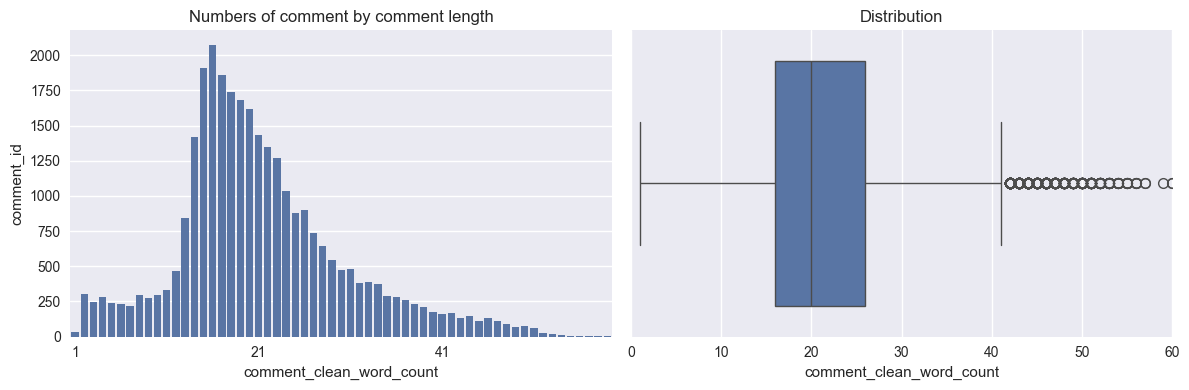

In [5]:
TextPLOT(fig_size=(12, 4)).len_word(data=df, col_target='comment_clean_word_count', col_agg='comment_id', name='comment')